# Analyser les données TD1: Pandas

Lien TD1 : https://wiki.centrale-marseille.fr/digitale/pedagogie:rec:td1#analyser_les_donneespandas

### Imports des librairies 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
sns.set() 

### Chargement des données 

In [26]:
data = pandas.read_csv("ventes_new.csv")
data

,Unnamed: 0,NUM_COMMANDE,QUANTITE,PRIX_UNITAIRE,MONTANT,DATE_COMMANDE,STATUT,TRIMESTRE,MOIS,ANNEE,...,TELEPHONE,ADRESSE_1,ADRESSE_2,VILLE,ETAT,CODE_POSTAL,PAYS,ZONE_GEOGRAPHIQUE,NOM_CONTACT,PRENOM_CONTACT
0,0,10107,30,95.70,2871.00,2/24/2003 0:00,Envoyé,1,2,2003,...,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,United States,NaN,Yu,Kwai
1,1,10121,34,81.32,2764.87,2003/07/05,Envoyé,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul
2,2,10134,41,94.74,3884.33,2003/01/07,Envoyé,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel
3,3,10145,45,83.24,3745.80,8/25/2003 0:00,Envoyé,3,8,2003,...,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie
4,4,10159,49,106.23,5205.27,2003/10/10,Envoyé,4,10,2003,...,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,United States,NaN,Brown,Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2818,10350,20,112.20,2244.00,2004/02/12,Envoyé,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
2819,2819,10373,29,137.19,3978.51,1/31/2005 0:00,Envoyé,1,1,2005,...,981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko
2820,2820,10386,43,125.98,5417.14,2005/01/03,Résolu,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
2821,2821,10397,34,62.23,2115.81,3/28/2005 0:00,Envoyé,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette


Affichage des colonnes

In [25]:
data.columns

Index(['Unnamed: 0', 'NUM_COMMANDE', 'QUANTITE', 'PRIX_UNITAIRE', 'MONTANT',
       'DATE_COMMANDE', 'STATUT', 'TRIMESTRE', 'MOIS', 'ANNEE', 'TYPE_PRODUIT',
       'CODE_PRODUIT', 'CLIENT', 'TELEPHONE', 'ADRESSE_1', 'ADRESSE_2',
       'VILLE', 'ETAT', 'CODE_POSTAL', 'PAYS', 'ZONE_GEOGRAPHIQUE',
       'NOM_CONTACT', 'PRENOM_CONTACT'],
      dtype='object')

## Partie 1
- Pour la colonne 'PAYS', remplacez toutes les occurrences de la valeur 'United States' par 'USA'.

In [11]:
index_usa_pays = data[data.PAYS == 'United States'].index
data.at[index_usa_pays, 'PAYS'] = 'USA'

- Définissez la 'ZONE_GEOGRAPHIQUE' des USA comme valant 'USA'

In [12]:
data.at[index_usa_pays, 'ZONE_GEOGRAPHIQUE'] = 'USA'

- Trouvez le nombre de commmandes (sans doublons), le nombre de clients référencés (sans doublons), et le nombre de références produits (sans doublons).

In [21]:
print('Nombre de commandes : ' + str(data.NUM_COMMANDE.drop_duplicates().count()))
print('Nombre de clients : ' + str(data.CLIENT.drop_duplicates().count()))
print('Nombre références produits : ' + str(data.CODE_PRODUIT.drop_duplicates().count()))

Nombre de commandes : 307
Nombre de clients : 92
Nombre références produits : 109


- Pour chaque client affichez le nombre de commandes, la ville et le chiffre d'affaires réalisé

In [73]:
client_grp = data.groupby(['CLIENT', 'VILLE'])
client_grp.NUM_COMMANDE.count()

CLIENT                       VILLE       
AV Stores, Co.               Manchester      51
Alpha Cognac                 Toulouse        20
Amica Models & Co.           Torino          26
Anna's Decorations, Ltd      North Sydney    46
Atelier graphique            Nantes           7
                                             ..
Vida Sport, Ltd              Genève          31
Vitachrome Inc.              NYC             25
Volvo Model Replicas, Co     Luleå           19
West Coast Collectables Co.  Burbank         13
giftsbymail.co.uk            Cowes           26
Name: NUM_COMMANDE, Length: 92, dtype: int64

In [70]:
client_grp.MONTANT.sum()

CLIENT                       VILLE       
AV Stores, Co.               Manchester      157792.65
Alpha Cognac                 Toulouse         70484.93
Amica Models & Co.           Torino           94110.80
Anna's Decorations, Ltd      North Sydney    153982.85
Atelier graphique            Nantes           24177.65
                                               ...    
Vida Sport, Ltd              Genève          117703.45
Vitachrome Inc.              NYC              88033.95
Volvo Model Replicas, Co     Luleå            75749.71
West Coast Collectables Co.  Burbank          46081.55
giftsbymail.co.uk            Cowes            78232.46
Name: MONTANT, Length: 92, dtype: float64

- Donnez sous forme de graphique l'évolution du nombre de ventes au cours du temps

<AxesSubplot:xlabel='ANNEE,MOIS'>

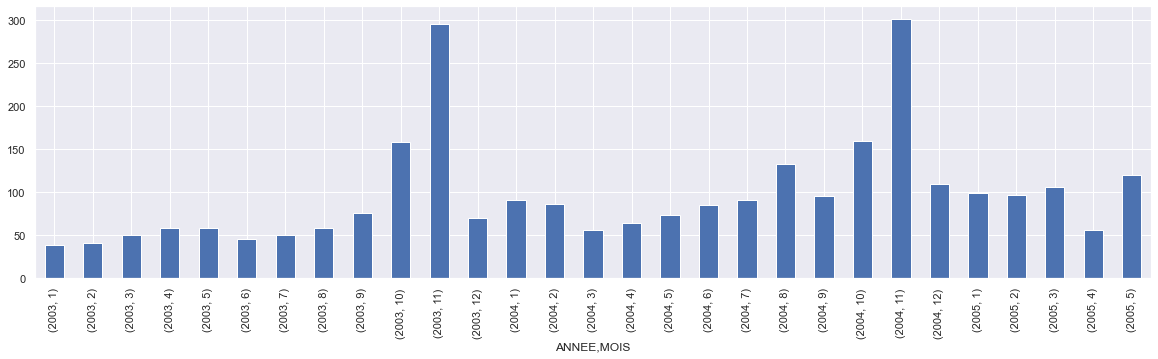

In [79]:
plt.figure()
data.groupby(['ANNEE', 'MOIS']).NUM_COMMANDE.count().plot(kind="bar", figsize = (20,5))

- Donnez le chiffre d’affaires par année et trimestre pour les ventes réalisées aux états unis

In [82]:
data[data.PAYS == 'United States'].groupby(['ANNEE', 'MOIS']).MONTANT.sum()

ANNEE  MOIS
2003   2        2871.00
       10      10065.51
       12       2168.54
2004   1        6074.95
       5        6120.00
       6        3676.76
       11       7399.14
       12       5691.52
Name: MONTANT, dtype: float64

- Pour chaque type de produit, donnez le code_produit du véhicule le plus vendu (en nombre d'unités).

In [179]:
type_code_grp = data.groupby(['TYPE_PRODUIT', 'CODE_PRODUIT']).sum()['QUANTITE']
type_code_grp.groupby(['TYPE_PRODUIT']).idxmax()

TYPE_PRODUIT
Avions                             (Avions, S700_4002)
Bateaux                           (Bateaux, S700_2610)
Camions et bus              (Camions et bus, S18_4600)
Motos                                (Motos, S12_2823)
Trains                              (Trains, S50_1514)
Voitures anciennes      (Voitures anciennes, S50_1341)
Voitures classiques    (Voitures classiques, S18_3232)
Name: QUANTITE, dtype: object

## Partie 2
 - Donnez l'évolution du chiffre d'affaires par année et trimestre pour tous les pays (mettre fill_value = 0).

<AxesSubplot:xlabel='ANNEE,TRIMESTRE'>

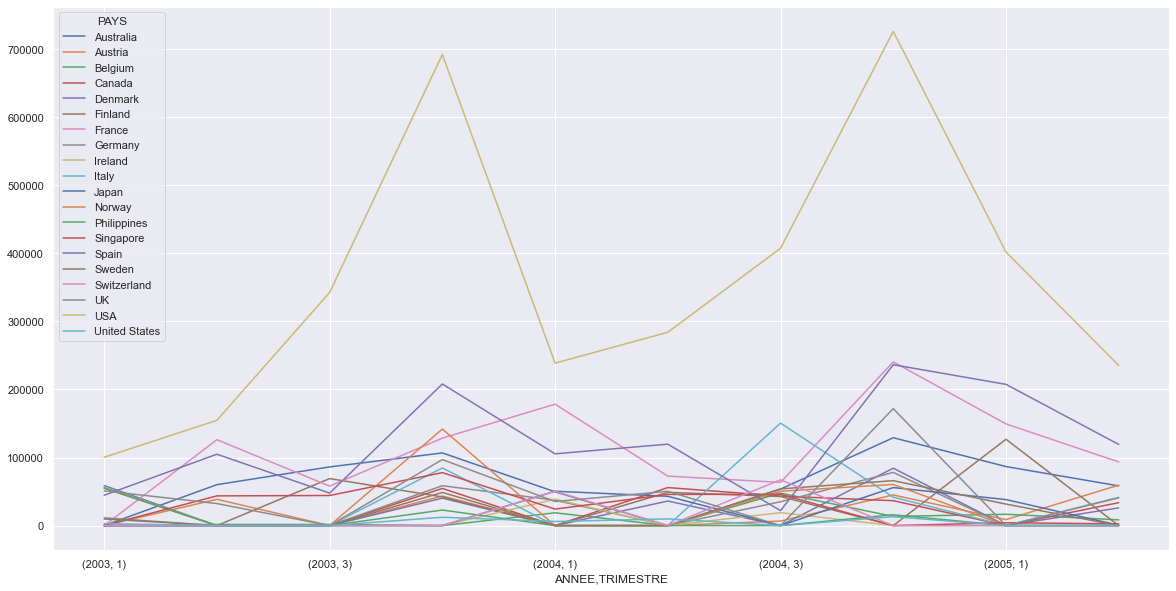

In [189]:
CA_country = pandas.pivot_table(data, values = 'MONTANT', index = ['ANNEE', 'TRIMESTRE'], columns = ['PAYS'], aggfunc=np.sum, fill_value=0)
CA_country.plot(kind='line', figsize= (20, 10))

- Afficher le nombre de clients et le chiffre d'affaires (somme des montants)
    - par zone géographique
    - par zone géographique puis par pays
    - par zone géographique puis par pays puis par ville